# Visualizing Instacart Data

In [1]:
# loading modules
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import janitor

In [2]:
# loading in the dataset
path = r'/Users/johntam/cf_data_analysis/tasks/A4/code/clean_data'
final = pd.read_pickle(os.path.join(path,'final.pkl'))

In [4]:
final.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surnam,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## creating subset of data 

In [7]:
sub_final = final[['loyalty_flag','prices','order_hour_of_day','n_dependants','age','income']]

In [8]:
# creating a random subset for initial graphs
np.random.seed(9)
dev = np.random.rand(len(sub_final)) <= 0.7
big = sub_final[dev].reset_index(drop = True)
small = sub_final[~dev].reset_index(drop = True)

## visualizations

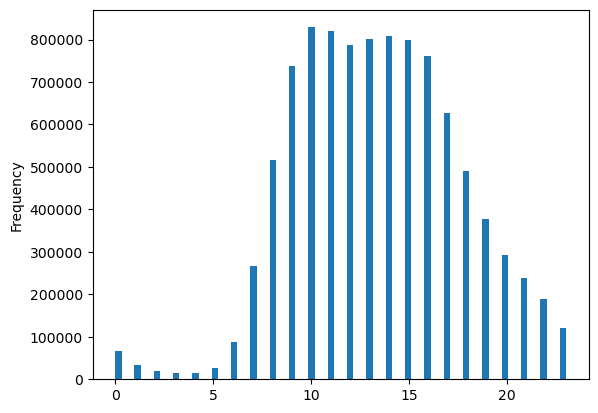

In [9]:
# order hour histogram
order_hour = small['order_hour_of_day'].plot.hist(bins = 70)

In [ ]:
# creating bar chart for loyalty_flag 
bar = small['loyalty_flag'].value_counts().plot.bar(color=['gray'])

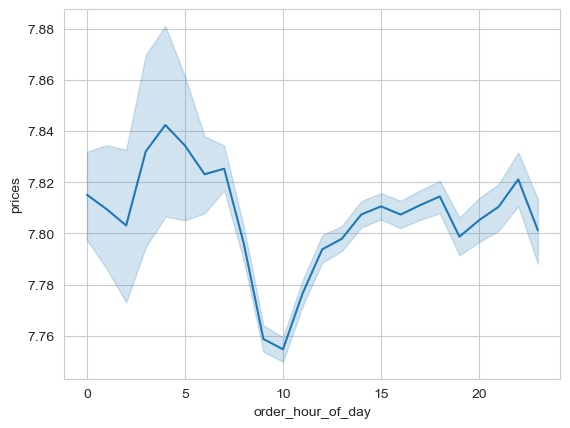

In [11]:
sns.set_style('whitegrid')

order_prices = sns.lineplot(data=sub_final[['order_hour_of_day','prices']], x='order_hour_of_day', y='prices')


In [ ]:
# creating a line chart of order hour of day vs price
age_x_dependents = sns.lineplot(data = small, x = 'age', y ='n_dependants')

it doesn't look like there is a strong relationship between age and number of dependents.

In [ ]:
# creaing a scatterplot betwen age and spending power
age_x_income = sns.scatterplot(x = 'age', y = 'income', data = small)

it looks like there is a significant difference in income between those under 40 and those over 40.

## exporting graphs

In [12]:
path = r'/Users/johntam/cf_data_analysis/tasks/A4/code/visualizations'

# Save each figure as a PNG file in the directory
figures = [order_hour.get_figure(), order_prices.get_figure(), bar.get_figure(), age_x_dependents.get_figure(), age_x_income.get_figure()]
for i, fig in enumerate(figures):
    fig.savefig(os.path.join(path, f"figure_{i+1}.png"))
    plt.close(fig)

# Close all figures
plt.close('all')

        